# Proyek Analisis Data: Air Quality Dataset


- Kelompok : 6
- Anggota : </br>
10121018 - Andika Dwi Putra</br>
10121025 - Alif Munawar</br>
10124907 - M. Fatur Maulidan Azzahra</br>
10123200 - Fadhilah Dwi Febrianto</br>
10123201 - Muhammad Fauzi Mugni</br>
10123912 - Muhammad Rizal Al Multazzam

# Penjelasan mengenai fitur



* year: Tahun pengukuran kualitas udara, direpresentasikan sebagai bilangan bulat (contoh: 2020, 2021).
* month: Bulan pengukuran (1–12), yang menunjukkan bulan dalam setahun.
* day: Hari pengukuran (1–31), sesuai dengan tanggal tertentu dalam bulan.
* hour: Jam pengukuran (0–23), menunjukkan waktu pengambilan data dalam format 24 jam.
* PM2.5: Konsentrasi partikel udara halus berukuran ≤2,5 mikrometer dalam udara, diukur dalam mikrogram per meter kubik (µg/m³). Partikel ini berbahaya bagi kesehatan karena dapat masuk jauh ke dalam paru-paru.
* PM10: Konsentrasi partikel udara kasar berukuran ≤10 mikrometer, diukur dalam µg/m³.
* SO₂ (Sulfur Dioksida): Gas polutan yang biasanya berasal dari pembakaran bahan bakar fosil, diukur dalam µg/m³.
* NO₂ (Nitrogen Dioksida): Polutan gas yang dihasilkan oleh kendaraan bermotor dan pembakaran industri, diukur dalam µg/m³.
* CO (Karbon Monoksida): Gas tidak berwarna dan tidak berbau yang dihasilkan dari pembakaran tidak sempurna, diukur dalam µg/m³.
* O₃ (Ozon): Gas ozon di udara, yang berperan dalam kualitas udara dan tingkat polusi, diukur dalam µg/m³.
* TEMP (Temperature): Suhu udara di lokasi pengukuran, diukur dalam derajat Celsius (°C).
* PRES (Pressure): Tekanan atmosfer pada lokasi pengukuran, diukur dalam hektopascal (hPa).
* DEWP (Dew Point): Titik embun, yaitu suhu di mana udara menjadi jenuh dengan uap air, diukur dalam derajat Celsius (°C).
* RAIN (Rainfall): Curah hujan pada saat pengukuran, diukur dalam milimeter (mm).
* wd (Wind Direction): Arah angin saat pengukuran, biasanya dinyatakan dalam arah kardinal (seperti N, NE, E, dsb.).
* WSPM (Wind Speed): Kecepatan angin pada lokasi pengukuran, diukur dalam meter per detik (m/s).
* station: Nama atau kode stasiun pengukuran yang mengidentifikasi lokasi data diambil.

# Menentukan Pertanyaan Analisis

- Bagaimana perbandingan rata-rata tingkat polutan PM2.5 dan PM10 di setiap stasiun? - 10121018 - Andika Dwi Putra

- Bagaimana distribusi polutan NO2 dalam sehari di setiap stasiun? - 10121025 - Alif Munawar

- Bagaimana Polutan CO pada setiap stasiun yang ada, dan faktor apa yang mungkin memengaruhi stasiun tersebut bisa memiliki polutan CO yang sangat besar? - 10124907 - M. Fatur Maulidan Azzahra

- Bagaimana Pertumbuhan gas Ozon dari Tahun 2013 - 2017? - 10123200 - Fadhilah Dwi Febrianto

- Bagaimana pengaruh suhu udara (TEMP) terhadap konsentrasi PM2.5 di setiap stasiun pengukuran udara? - 10123912 - Muhammad Rizal Al Multazzam

- Bagaimana variasi harian CO dibandingkan dengan polutan lainnya - 10123201 - M. Fauzi Mugni

# Import Semua Packages/Library yang Digunakan


In [33]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.formula.api as smf
from sklearn.impute import KNNImputer

# Data Wrangling

##Gathering Data

In [34]:
file_paths = [
    "PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

In [35]:
# Membaca semua file dan menyimpannya dalam dictionary
dfs = {}
for file in file_paths:
      dfs[file] = pd.read_csv(file)


# Menampilkan beberapa baris pertama dari setiap dataframe
for name, df in dfs.items():
    print(f"\nData dari: {name}")
    print(df)
    print("\n" + "-"*50 + "\n")


Data dari: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  

## Missing Value

In [36]:
# Memeriksa Missing Value dari setiap dataset
for file in file_paths:
    try:
        df = pd.read_csv(file)
        missing_values = df.isnull().sum()
        print(f"Missing values in {file}:")
        print(missing_values)
        print("-" * 40)
    except Exception as e:
        print(f"Error processing {file}: {e}")

Missing values in PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
----------------------------------------
Missing values in PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv:
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64
----------------------------------------
Missing values in PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv:
No            0
year          0
month         0

## Cleaning Data

### Menangani Missing Value

In [37]:
# Folder tempat menyimpan hasil
output_folder = "processed_files"
os.makedirs(output_folder, exist_ok=True)
    
# Loop untuk memproses setiap file
for file in file_paths:
    file_path = f"{file}"
    folder, filename = os.path.split(file_path)

    try:
        # Load dataset
        df = pd.read_csv(file_path)

        # Konversi kolom waktu menjadi format datetime
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

        # Hapus kolom year, month, day, hour karena sudah tergabung dalam datetime
        df = df.drop(columns=['year', 'month', 'day', 'hour'])

        # Set datetime sebagai index untuk interpolasi time series
        df = df.set_index('datetime')

        # 1. Mengisi kolom dengan missing value 1-3% menggunakan interpolasi berbasis waktu
        columns_interpolation = ["PM2.5", "PM10", "SO2", "O3","TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
        df[columns_interpolation] = df[columns_interpolation].interpolate(method="time")

        # 2. Mengisi kolom dengan missing value >3% menggunakan KNN Imputer
        columns_knn_impute = ["CO", "NO2"]
        imputer = KNNImputer(n_neighbors=5)
        df[columns_knn_impute] = imputer.fit_transform(df[columns_knn_impute])

        # 3. Mengisi kolom kategorikal "wd" dengan mode (nilai yang paling sering muncul)
        df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

        # Reset index kembali ke format semula
        df = df.reset_index()

        # Simpan hasil dengan nama baru
        output_file_path = os.path.join(output_folder, f"processed_{filename}")
        df.to_csv(output_file_path, index=False)
        print(f"Processed and saved: {output_file_path}")

    except Exception as e:
        print(f"Error processing {file}: {e}")

print("Semua file telah diproses dan disimpan di folder processed_files.")

Processed and saved: processed_files/processed_PRSA_Data_Aotizhongxin_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Changping_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Dingling_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Dongsi_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Guanyuan_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Gucheng_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Huairou_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Nongzhanguan_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Shunyi_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Tiantan_20130301-20170228.csv
Processed and saved: processed_files/processed_PRSA_Data_Wanliu_20130301-20170228.csv
Processed and saved: processed_f

In [38]:
# Folder yang berisi file CSV
folder_path = "processed_files/"  # Ganti dengan path folder yang sesuai

# Mengambil semua file CSV dalam folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Membaca dan menggabungkan semua file CSV menjadi satu DataFrame
combined_df = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)

# Menampilkan beberapa data awal
combined_df

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013-03-01 01:00:00,2,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013-03-01 02:00:00,3,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013-03-01 03:00:00,4,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013-03-01 04:00:00,5,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,35060,28.0,47.0,4.0,14.0,300.0,33.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
420764,2017-02-28 20:00:00,35061,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
420765,2017-02-28 21:00:00,35062,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
420766,2017-02-28 22:00:00,35063,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [39]:
combined_df.isnull().sum()

datetime    0
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

### Menangani Outlier



In [40]:
# Daftar kolom numerik
numeric_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN", "WSPM"]

# Menghitung Z-score
df_zscore = combined_df[numeric_cols].apply(zscore)

# Menentukan threshold untuk outlier
threshold = 3

# Menampilkan jumlah outlier per kolom
outliers_count = (np.abs(df_zscore) > threshold).sum()
print("Jumlah Outlier per Kolom:")
print(outliers_count)

Jumlah Outlier per Kolom:
PM2.5    7637
PM10     6645
SO2      9647
NO2      4308
CO       9358
O3       6985
RAIN     2412
WSPM     7558
dtype: int64


In [41]:
# Menyaring data dengan membuang outlier
df_cleaned = combined_df[(np.abs(df_zscore) < threshold).all(axis=1)]

# Menampilkan jumlah data sebelum dan sesudah pembersihan
print(f"Jumlah data sebelum pembersihan: {len(combined_df)}")
print(f"Jumlah data setelah pembersihan: {len(df_cleaned)}")

Jumlah data sebelum pembersihan: 420768
Jumlah data setelah pembersihan: 381359


In [42]:
df_cleaned.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,381359.000000,381359.000000,381359.000000,381359.000000,381359.000000,381359.000000,381359.000000,381359.000000,381359.000000,381359.000000,381359.000000,381359.000000
mean,17621.473617,69.738924,92.559037,13.392839,47.884183,1092.210350,55.207801,13.807455,1010.682596,2.760343,0.021791,1.655889
std,10117.389150,63.125840,71.641410,15.729794,30.548126,824.942128,50.781380,11.249792,10.470339,13.848734,0.158286,1.082225
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,9038.000000,20.000000,34.000000,2.000000,23.000000,500.000000,12.000000,3.800000,1002.200000,-9.000000,0.000000,0.900000
50%,17730.000000,51.000000,77.000000,7.000000,43.000000,900.000000,45.000000,15.000000,1010.100000,3.900000,0.000000,1.400000
75%,26460.000000,101.000000,134.000000,18.000000,67.000000,1400.000000,81.000000,23.300000,1019.000000,15.300000,0.000000,2.200000
max,35064.000000,322.000000,382.200000,81.542553,155.000000,4680.000000,228.425856,41.600000,1042.800000,29.100000,2.500000,5.400000


# Exploratory Data Analysis (EDA)

In [43]:
# Membuat fungsi untuk menentukan kategori kualitas udara berdasarkan nilai PM2.5
def kategori_kualitasudara(pm25):
    if pm25 <= 12:
        return 'Baik'
    elif 12 < pm25 <= 35.4:
        return 'Sedang'
    elif 35.4 < pm25 <= 55.4:
        return 'Tidak sehat bagi kelompok sensitif'
    elif 55.4 < pm25 <= 150.4:
        return 'Tidak sehat'
    elif 150.4 < pm25 <= 250.4:
        return 'Sangat tidak sehat'
    else:
        return 'Berbahaya'

# Menambahkan kolom indeks kualitas udara
df_cleaned['Level_AQI'] = df_cleaned['PM2.5'].apply(kategori_kualitasudara)
df_cleaned

/var/folders/t0/v6_cjw1d22v_kj967wgqs5kc0000gn/T/ipykernel_82930/990613661.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Level_AQI'] = df_cleaned['PM2.5'].apply(kategori_kualitasudara)


,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Level_AQI
0,2013-03-01 00:00:00,1,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Baik
1,2013-03-01 01:00:00,2,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Baik
3,2013-03-01 03:00:00,4,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Baik
4,2013-03-01 04:00:00,5,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Baik
5,2013-03-01 05:00:00,6,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,N,3.7,Guanyuan,Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,35060,28.0,47.0,4.0,14.0,300.0,33.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping,Sedang
420764,2017-02-28 20:00:00,35061,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping,Baik
420765,2017-02-28 21:00:00,35062,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping,Baik
420766,2017-02-28 22:00:00,35063,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping,Baik


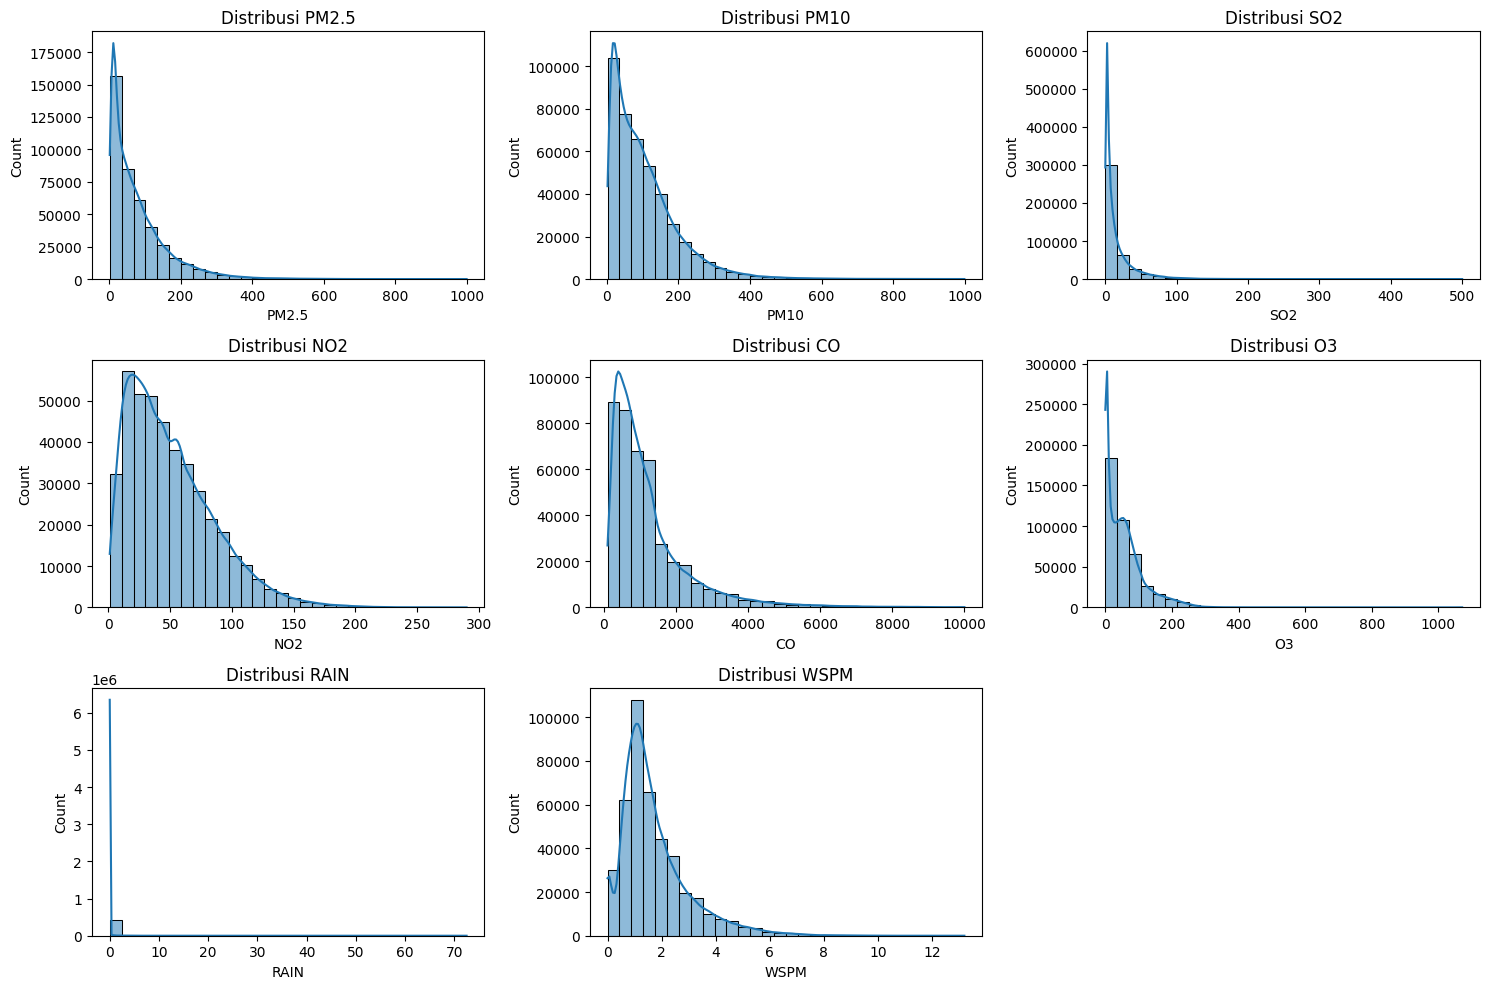

In [44]:
# 2. Visualisasi distribusi data numerik
numeric_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN", "WSPM"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(combined_df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

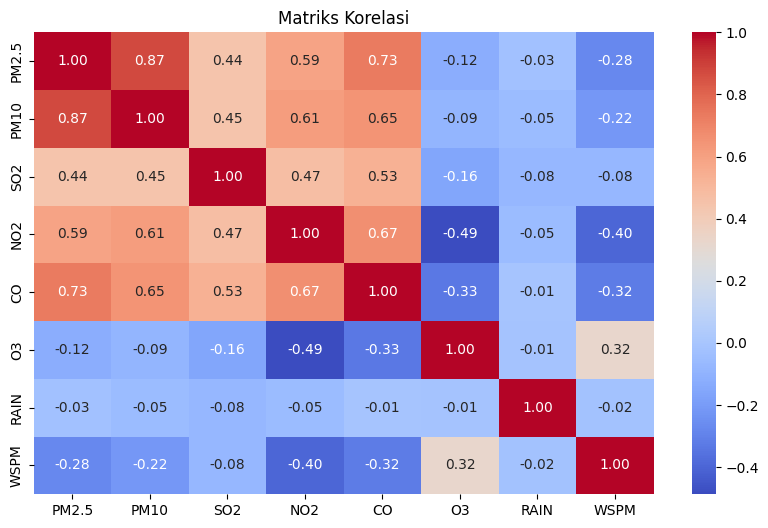

In [45]:
# 3. Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

/var/folders/t0/v6_cjw1d22v_kj967wgqs5kc0000gn/T/ipykernel_82930/3202810986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime'])
/var/folders/t0/v6_cjw1d22v_kj967wgqs5kc0000gn/T/ipykernel_82930/3202810986.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cleaned['PM2.5'].resample('M').mean().plot()


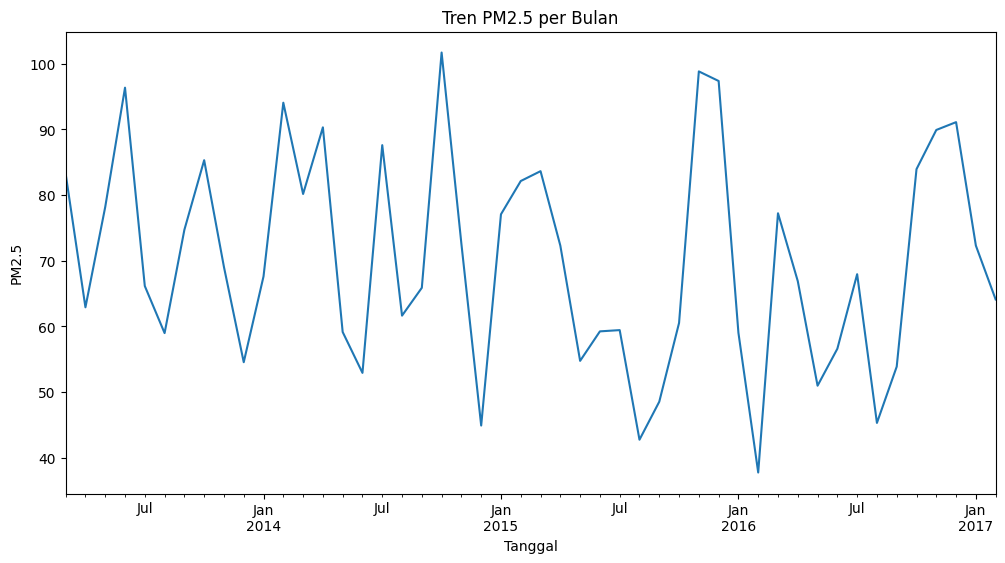

In [46]:
# 5. Tren data waktu untuk PM2.5
if 'datetime' in df_cleaned.columns:
    df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime'])
    df_cleaned = df_cleaned.set_index('datetime')
    plt.figure(figsize=(12, 6))
    df_cleaned['PM2.5'].resample('M').mean().plot()
    plt.title('Tren PM2.5 per Bulan')
    plt.xlabel('Tanggal')
    plt.ylabel('PM2.5')
    plt.show()
else:
    print("Kolom 'datetime' tidak ditemukan dalam dataset.")


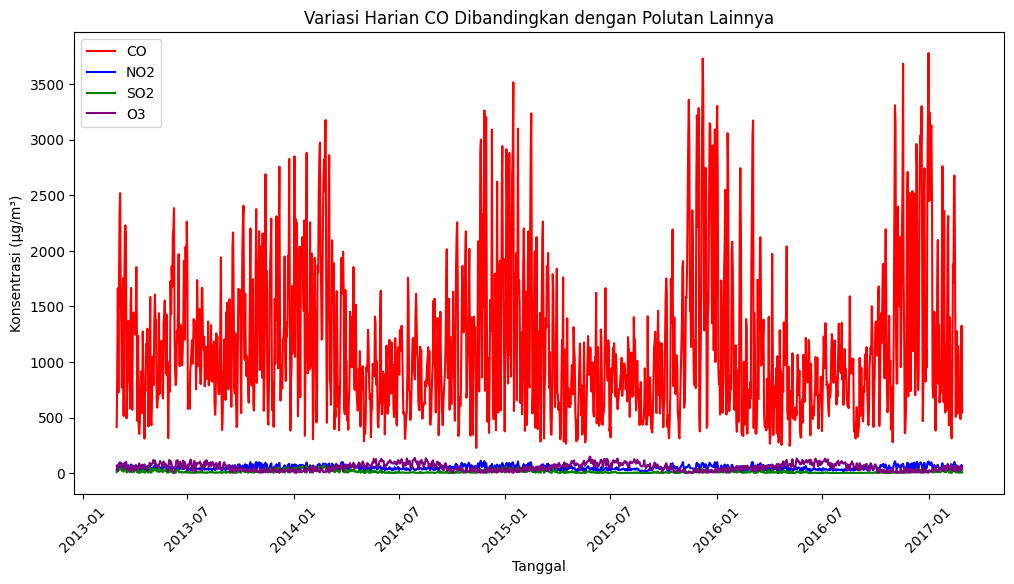

In [47]:
# 6. Variasi Harian CO Dibandingkan dengan Polutan Lainnya

# Define available_cols and calculate daily_avg before using them
available_cols = ['CO', 'NO2', 'SO2', 'O3']

# Reset index before resampling if 'datetime' is not a column anymore
df_cleaned = df_cleaned.reset_index()
daily_avg = df_cleaned[available_cols + ['datetime']].resample('D', on='datetime').mean()
if not daily_avg.empty:
    plt.figure(figsize=(12, 6))
    for col, color in zip(available_cols, ['red', 'blue', 'green', 'purple']):

        # Use daily_avg.index for the x-axis instead of daily_avg['datetime']
        sns.lineplot(data=daily_avg, x=daily_avg.index, y=col, label=col, color=color)

    plt.xlabel('Tanggal')
    plt.ylabel('Konsentrasi (µg/m³)')
    plt.title('Variasi Harian CO Dibandingkan dengan Polutan Lainnya')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
else:
    print("daily_avg kosong setelah resampling, periksa kembali dataset.")